In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

In [3]:
df = pd.read_csv("beta_vs_T.csv")
data = df.to_numpy()
print(data[0:5,:])

[[310.    40.14]
 [330.    40.08]
 [350.    40.14]
 [370.    40.26]
 [390.    40.53]]


In [8]:
TK = data[:,0]
beta = data[:,1]


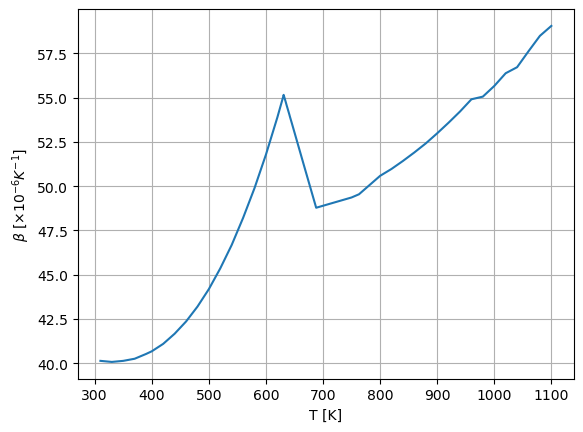

In [10]:
plt.plot(TK,beta)
plt.xlabel("T [K]")
plt.ylabel("$\\beta$ [$\\times 10^{-6} K^{-1}$]")
plt.grid(1)
plt.show()

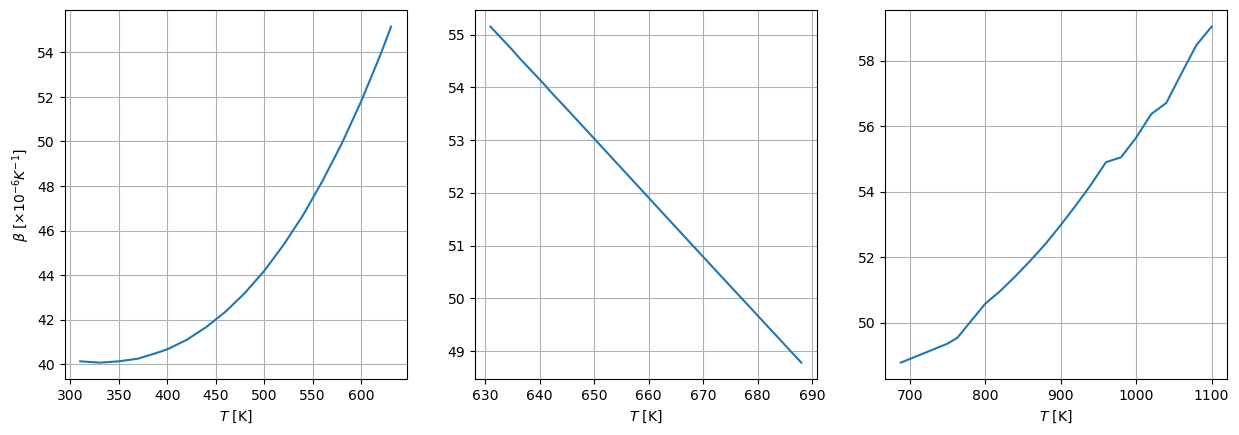

In [12]:
fig, axs = plt.subplots(1,3)
fig.set_figwidth(15)

axs[0].plot(TK[TK <= 631], beta[TK <= 631])
axs[0].set_xlabel("$T$ [K]")
axs[0].set_ylabel("$\\beta$ [$\\times 10^{-6} K^{-1}$]")
axs[0].grid(1)

axs[1].plot(TK[(TK >= 631) & (TK <= 688)], beta[(TK >= 631) & (TK <= 688)])
axs[1].set_xlabel("$T$ [K]")
axs[1].grid(1)

axs[2].plot(TK[TK >= 688], beta[TK >= 688])
axs[2].set_xlabel("$T$ [K]")
axs[2].grid(1)

plt.show()

In [28]:
poly_deg1 = 3
poly_deg2 = 2
poly_func1 = PolynomialFeatures(poly_deg1)
poly_func2 = PolynomialFeatures(poly_deg2)

x1 = np.array(TK[TK <= 631]).reshape(-1,1)
t1 = poly_func1.fit_transform(x1)
y1 = np.array(beta[TK <= 631]).reshape(-1,1)

x2 = np.array(TK[(TK >= 631) & (TK <= 688)]).reshape(-1,1)
y2 = np.array(beta[(TK >= 631) & (TK <= 688)]).reshape(-1,1)

x3 = np.array(TK[TK >= 688]).reshape(-1,1)
t3 = poly_func2.fit_transform(x3)
y3 = np.array(beta[TK >= 688]).reshape(-1,1)

model1 = LinearRegression()
model2 = LinearRegression()
model3 = LinearRegression()

model1.fit(t1,y1)
model2.fit(x2,y2)
model3.fit(t3,y3)

print(f"set 1 coefs: {model1.intercept_} {model1.coef_}")
print(f"set 2 coefs: {model2.intercept_} {model2.coef_}")
print(f"set 3 coefs: {model3.intercept_} {model3.coef_}")

set 1 coefs: [46.29391086] [[ 0.00000000e+00 -1.80692616e-02 -6.04268663e-05  1.76344163e-07]]
set 2 coefs: [125.72851444] [[-0.11184634]]
set 3 coefs: [48.50056087] [[ 0.00000000e+00 -1.60505423e-02  2.33002672e-05]]


In [29]:
y1_pred = model1.predict(t1)
y2_pred = model2.predict(x2)
y3_pred = model3.predict(t3)

Y = np.append(y1_pred,y2_pred[1:])
Y = np.append(Y,y3_pred[1:])

print(Y.shape)
print(beta.shape)
MSE = np.mean((Y - beta)**2)
print(f"MSE = {MSE}")

(54,)
(54,)
MSE = 0.007995782283528928


In [30]:
def beta_disc(x):
    if 273 <= x <= 631:
        return 46.29391086 + -1.80692616e-02*x + -6.04268663e-05*x**2 + 1.76344163e-07*x**3
    if 631 < x <= 688:
        return 125.72851444 + -0.11184634*x
    else:
        return 48.50056087 + -1.60505423e-02*x + 2.33002672e-05*x**2

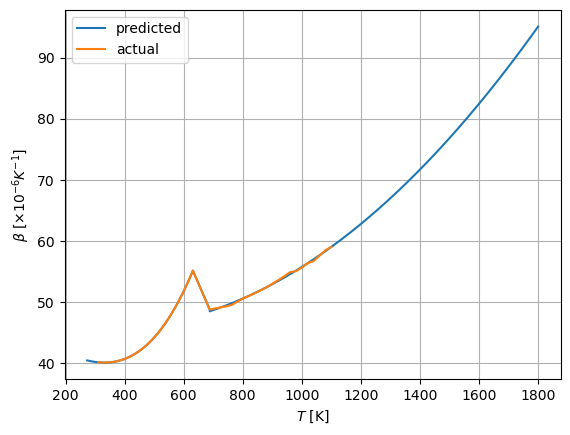

In [32]:
T_test = np.arange(273,1800,0.1)
model = []

for i in T_test:
    model.append(beta_disc(i))

plt.plot(T_test,model)
plt.plot(TK,beta)
plt.xlabel("$T$ [K]")
plt.ylabel("$\\beta$ [$\\times 10^{-6} K^{-1}$]")
plt.legend(["predicted", "actual"])
plt.grid(1)
plt.show()

Thus, the thermal expansion coefficient of nickel can be modelled as:

$$\times 10^{-6} \beta(T_K) = \left\{ \begin{array} {ll}
    46.294  - (1.807 \times 10^{-2})T_K - (6.043\times 10^{-5})T_K^2 + (1.763\times 10^{-7})T_K^3 & T_K \in [273,631]K \\ \\
    125.729 - 0.112T_K & T_K \in (631,688]K \\ \\
    48.501  - (1.605\times 10^{-2})T_K + (2.330\times 10^{-5})T_K^2 & T_K > 688K
    \end{array}
    \right. $$

Where $T_K$ is the temperature in Kelvin.